<a href="https://colab.research.google.com/github/Sarthaksaraf96/Analysing-Global-Terrorism-Dataset/blob/main/Capstone_Project_Global_Terrorism_Dataset_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Global Terrorism Dataset






##### **Project Type**    - EDA
##### **Contribution**    - Sarthak Saraf


# **Project Summary -**

* **Project Summary: Analyzing Global Terrorism Incidents**
  - The project embarked on a comprehensive analysis of global terrorism incidents sourced from a robust dataset encompassing various dimensions of terrorist activities worldwide. This exploration aimed to uncover underlying patterns, trends, and crucial indicators that shed light on the nature and impact of terrorism across different regions and timeframes.

* **Scope and Objective:**
  - The primary objective was to conduct an in-depth examination of historical terrorist incidents, leveraging data-driven analysis to glean actionable insights. The dataset contained a wealth of information ranging from temporal details such as incident dates, locations, and attack types to specifics about casualties, targets, and perpetrating groups.

* **Methodology:**
  - The analysis journey commenced with meticulous data cleaning and preprocessing to ensure data integrity. Leveraging descriptive and exploratory analysis techniques, the project delved into temporal trends, identifying peak and low activity years, and elucidating monthly and daily attack frequencies. Geospatial analysis revealed hotspots of terrorism, showcasing regions and countries most affected by these incidents.

* **Key Findings:** The analysis revealed intriguing insights into the varied nature of terrorism:

  - Temporal Insights: Highlighted years with the highest and lowest incidents, revealing shifting patterns over time.
  - Geographical Distribution: Uncovered regions and countries significantly impacted by terrorist activities, aiding in risk assessment and prioritizing security measures.
  - Attack Types and Impact: Explored the relationship between attack methodologies and resulting casualties or property damage, indicating the severity and nature of different attack types.
  - Perpetrators and Targets: Identified the most active terrorist groups and their preferred targets, providing a comprehensive understanding of their motives and strategies.
* **Implications and Recommendations:** The project's outcomes hold substantial implications for various stakeholders:

  - Policy and Security: Insights enable policymakers and security agencies to formulate targeted strategies, focusing resources on high-risk areas and enhancing preemptive measures.
  - Business and Operational Resilience: Businesses can employ these findings to fortify supply chains, devise crisis response plans, and make informed decisions regarding expansions or resource allocation.
  - Community Engagement: Collaboration with affected communities or regions becomes more targeted and effective, supporting social responsibility initiatives and peace-building efforts.

* **Conclusion:**
  - The analysis of global terrorism incidents offers a nuanced understanding of the multifaceted landscape of terrorist activities. The insights derived from this comprehensive analysis empower stakeholders across diverse sectors to make informed decisions, fortify security measures, and contribute towards fostering safer, resilient communities in the face of this critical global challenge.

# **GitHub Link -**

GutHub Link : https://github.com/Sarthaksaraf96/Capstone-Project-EDA-of-Global-Terrorism/tree/main

# **Problem Statement**


**Despite having historical data on global terrorism incidents, there is a challenge in effectively utilizing this data to proactively mitigate risks, optimize operations, and ensure the safety and security of business assets and stakeholders against terrorist threats**

#### **Define Your Business Objective?**

* **Security Enhancement:**Enhance security measures to minimize the impact of terrorist incidents on business operations.

* **Risk-Informed Decision-Making:** Make informed decisions considering terrorism-related risks.

* **Community Engagement and CSR:** Foster community engagement and support social responsibility initiatives in regions affected by terrorism.

* **Brand Protection and Crisis Management:** Safeguard brand reputation during crises and ensure swift crisis management.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


### Dataset Loading

In [2]:
# Load Dataset
data = pd.read_csv('/content/gdrive/MyDrive/GlobalTerrorismData.csv', encoding_errors= 'replace')
data

<ipython-input-2-e3126869bb29>:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/gdrive/MyDrive/GlobalTerrorismData.csv', encoding_errors= 'replace')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


### Dataset First View

In [3]:
# Dataset First Look
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
len(data.axes[0])

181691

### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
data.drop_duplicates()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
                     ...  
suicide                  0
success                  0
crit3                    0
property                 0
eventid                  0
Length: 135, dtype: int64

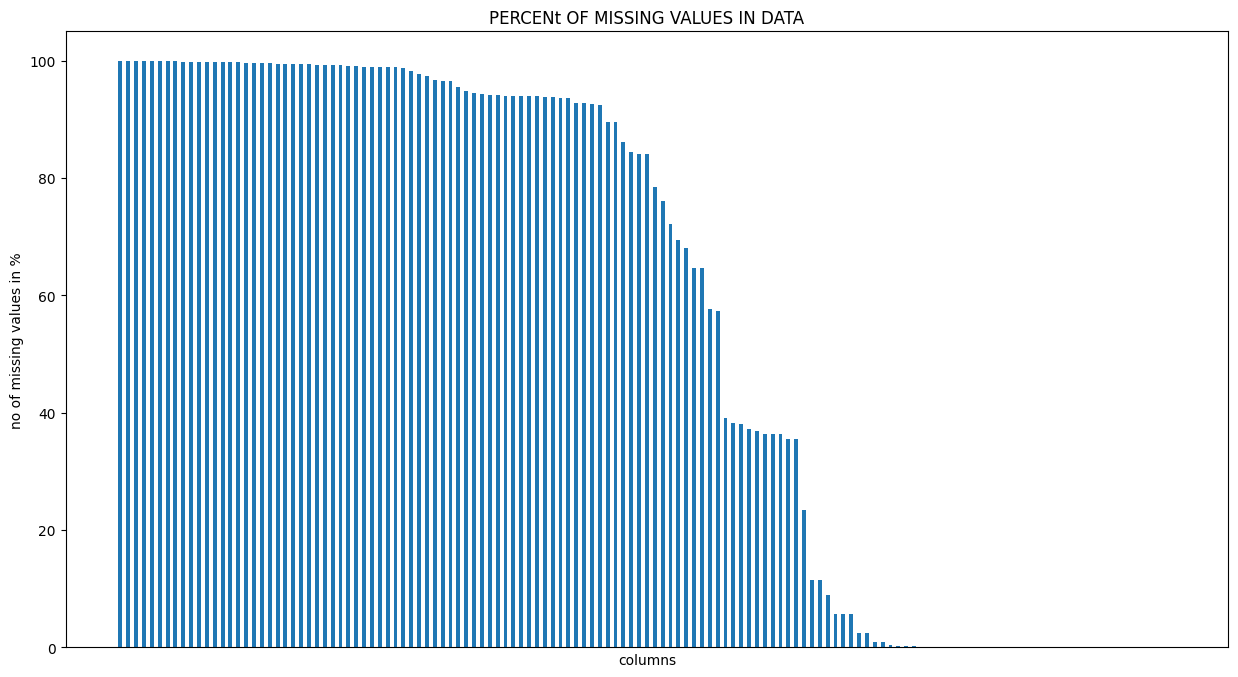

In [9]:
# Visualizing the missing values in %
percent_bar_x = data.columns
percent_bar_y = missing_values*100/len(data)
fig = plt.figure(figsize =(15, 8))
plt.bar(percent_bar_x,percent_bar_y,width = 0.5)
plt.xlabel('columns')
plt.xticks([])
plt.ylabel('no of missing values in %')
plt.title('PERCENt OF MISSING VALUES IN DATA')
plt.show()

In [10]:
#this function Removes the Columns from the dataset which has more than threshold % of null values
def Drop_MissingVal(data , threshold ):
  droped={}
  for ColName in data.columns:
    missed_data_in_column= data[ColName].isnull().sum()
    len_of_data_in_column = len(data[ColName])
    available_data_in_column = len_of_data_in_column-missed_data_in_column
    percent_missingData_in_column = missed_data_in_column*100/len_of_data_in_column
    if percent_missingData_in_column>threshold:
      data.drop([ColName],axis = 1,inplace = True)
      droped[ColName] = percent_missingData_in_column
  print('Droped Columns and % of null values present\n',droped)

In [11]:
#As of google search , Many of Data scientists suggest to drop the feature if Null values are more the 25-30% but client still wants to you to work on the dataset so Max Number for null values in collum allowded is ~50%
Drop_MissingVal(data = data , threshold = 50  )

Droped Columns and % of null values present
 {'approxdate': 94.91499303762983, 'resolution': 98.7781453126462, 'location': 69.45638474112641, 'alternative': 84.03278093026071, 'alternative_txt': 84.03278093026071, 'attacktype2': 96.5248691459676, 'attacktype2_txt': 96.5248691459676, 'attacktype3': 99.7644352224381, 'attacktype3_txt': 99.7644352224381, 'targtype2': 93.86650962348162, 'targtype2_txt': 93.86650962348162, 'targsubtype2': 94.11913633586694, 'targsubtype2_txt': 94.11913633586694, 'corp2': 94.43175501263134, 'target2': 93.93475736277526, 'natlty2': 94.04043128168153, 'natlty2_txt': 94.04043128168153, 'targtype3': 99.35274724669907, 'targtype3_txt': 99.35274724669907, 'targsubtype3': 99.39622766124904, 'targsubtype3_txt': 99.39622766124904, 'corp3': 99.43530499584459, 'target3': 99.35329763169337, 'natlty3': 99.36870841153387, 'natlty3_txt': 99.36870841153387, 'gsubname': 96.7582323835523, 'gname2': 98.89207500646702, 'gsubname2': 99.91193840091144, 'gname3': 99.82167526184566

### What did you know about your dataset?

So basically we Have removed the columns which has more than 50% of null values
But still we have the dataset  


In [12]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [14]:
# Dataset Describe
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,0.508058,3.167668,0.038944,0.107163,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,4.199937,35.949392,3.057361,1.488881,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,500.000000,8191.000000,751.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variables Description

* eventid: Unique identifier for each terrorist event.

* iyear: Year in which the incident occurred.

* imonth: Month in which the incident occurred.

* iday: Day of the month on which the incident occurred.

* extended: Indicates whether the duration of the incident extended beyond 24 hours.

* country: Numeric code representing the country in which the incident occurred.

* country_txt: Name of the country in which the incident occurred.

* region: Numeric code representing the region (geopolitical) in which the incident occurred.

* region_txt: Name of the region in which the incident occurred.

* provstate: Name of the province or state where the incident occurred.

* city: Name of the city or location where the incident occurred.

* latitude: Latitude coordinate of the incident location.

* longitude: Longitude coordinate of the incident location.

* specificity: Level of geographical precision for the incident location.

* vicinity: Indicates if the incident occurred in the immediate vicinity of the city (1) or not (0).

* crit1, crit2, crit3: Binary fields indicating whether the incident met certain criteria for terrorism.

* doubtterr: Level of doubt regarding whether the incident should be classified as an act of terrorism.

* multiple: Indicates if the incident involved multiple attacks (1) or not (0).

* success: Indicates if the attack was deemed successful (1) or not (0).

* suicide: Indicates if the attack was a suicide attack (1) or not (0).

* attacktype1: Numeric code representing the type of attack.

* attacktype1_txt: Description of the type of attack.

* targtype1: Numeric code representing the type of target/victim.

* targtype1_txt: Description of the target/victim type.

* target1: Specific target or victim of the attack.

* natlty1: Numeric code representing the nationality of the target/victim.

* natlty1_txt: Description of the nationality of the target/victim.

* gname: Name of the terrorist group responsible for the incident.

* guncertain1: Indicates uncertainty about the identity of the group responsible (1 for uncertain, 0 for certain).

* individual: Indicates if the attack was conducted by a lone individual (1) or not (0).

* weaptype1: Numeric code representing the type of weapon used.

* weaptype1_txt: Description of the weapon type.

* nkill: Number of confirmed fatalities in the incident.

* nkillus: Number of U.S. citizens killed in the incident.

* nkillter: Number of terrorists/fatalities during the incident.

* nwound: Number of confirmed non-fatal injuries.

* nwoundus: Number of U.S. citizens wounded in the incident.

* nwoundte: Number of terrorists/non-fatal injuries during the incident.

* property: Indicates if property was damaged or destroyed (1) or not (0).

* ishostkid: Indicates if hostages were taken during the incident (1) or not (0).

* dbsource: Source of the data.

* INT_LOG, INT_IDEO, INT_MISC, INT_ANY: Indicators of international impact or involvement in the incident.

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each Column .
def check_uniqueVar(data):
  for col in data:
    uni = data[col].nunique()
    print(col , ':', uni)

check_uniqueVar(data)

eventid : 181691
iyear : 47
imonth : 13
iday : 32
extended : 2
country : 205
country_txt : 205
region : 12
region_txt : 12
provstate : 2854
city : 36674
latitude : 48322
longitude : 48039
specificity : 5
vicinity : 3
summary : 112492
crit1 : 2
crit2 : 2
crit3 : 2
doubtterr : 3
multiple : 2
success : 2
suicide : 2
attacktype1 : 9
attacktype1_txt : 9
targtype1 : 22
targtype1_txt : 22
targsubtype1 : 112
targsubtype1_txt : 112
corp1 : 33238
target1 : 86006
natlty1 : 215
natlty1_txt : 215
gname : 3537
guncertain1 : 2
individual : 2
nperps : 113
nperpcap : 50
claimed : 3
weaptype1 : 12
weaptype1_txt : 12
weapsubtype1 : 30
weapsubtype1_txt : 30
weapdetail : 19148
nkill : 205
nkillus : 31
nkillter : 96
nwound : 238
nwoundus : 44
nwoundte : 44
property : 3
ishostkid : 3
scite1 : 83988
dbsource : 26
INT_LOG : 3
INT_IDEO : 3
INT_MISC : 3
INT_ANY : 3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Handelling missing/NULL/invalid values from the dataset

In [17]:
#Gives the sum of Null values present in each column
def null_vals(data):
  for col in data:
    print(col,' : ',data[col].isnull().sum())
null_vals(data)

eventid  :  0
iyear  :  0
imonth  :  0
iday  :  0
extended  :  0
country  :  0
country_txt  :  0
region  :  0
region_txt  :  0
provstate  :  421
city  :  434
latitude  :  4556
longitude  :  4557
specificity  :  6
vicinity  :  0
summary  :  66129
crit1  :  0
crit2  :  0
crit3  :  0
doubtterr  :  1
multiple  :  1
success  :  0
suicide  :  0
attacktype1  :  0
attacktype1_txt  :  0
targtype1  :  0
targtype1_txt  :  0
targsubtype1  :  10373
targsubtype1_txt  :  10373
corp1  :  42550
target1  :  636
natlty1  :  1559
natlty1_txt  :  1559
gname  :  0
guncertain1  :  380
individual  :  0
nperps  :  71115
nperpcap  :  69489
claimed  :  66120
weaptype1  :  0
weaptype1_txt  :  0
weapsubtype1  :  20768
weapsubtype1_txt  :  20768
weapdetail  :  67670
nkill  :  10313
nkillus  :  64446
nkillter  :  66958
nwound  :  16311
nwoundus  :  64702
nwoundte  :  69143
property  :  0
ishostkid  :  178
scite1  :  66191
dbsource  :  0
INT_LOG  :  0
INT_IDEO  :  0
INT_MISC  :  0
INT_ANY  :  0


In [18]:
# The location column contains 1,26,196 null values so there are two best options gather more information about the attack or Drop the entire column
# likewise summary column contains 66, 129 null values and currently for EDA this column is not needed

data = data.drop(['summary','scite1','weapsubtype1','weapsubtype1_txt','weapdetail','corp1','targsubtype1','targsubtype1_txt',
                  'nperps','nperpcap','claimed','imonth','iday','extended','country','region','provstate','specificity','vicinity',
                  'crit1', 'crit2', 'crit3','doubtterr', 'multiple','targtype1','target1','natlty1','natlty1_txt',
                  'guncertain1', 'individual', 'weaptype1','dbsource'], axis = 1)

# Resons for why droped these columns?
'''
1. some Columns are Not usefull for EDA such as summary can be used for NLP,
2. weapsubtype1,targsubtype1,country, etc are a numerical representation of the weapsubtype1_txt,targsubtype1_txt,country_txt
3. Some columns contains alot of Null values present so droping the null columns can be result in loss of data for other usefull variables
'''

'\n1. some Columns are Not usefull for EDA such as summary can be used for NLP,\n2. weapsubtype1,targsubtype1,country, etc are a numerical representation of the weapsubtype1_txt,targsubtype1_txt,country_txt\n3. Some columns contains alot of Null values present so droping the null columns can be result in loss of data for other usefull variables\n'

In [19]:
data

,eventid,iyear,country_txt,region_txt,city,latitude,longitude,success,suicide,attacktype1,...,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,1,0,1,...,NaN,0.0,NaN,NaN,0,0.0,0,0,0,0
1,197000000002,1970,Mexico,North America,Mexico city,19.371887,-99.086624,1,0,6,...,NaN,0.0,NaN,NaN,0,1.0,0,1,1,1
2,197001000001,1970,Philippines,Southeast Asia,Unknown,15.478598,120.599741,1,0,1,...,NaN,0.0,NaN,NaN,0,0.0,-9,-9,1,1
3,197001000002,1970,Greece,Western Europe,Athens,37.997490,23.762728,1,0,3,...,NaN,NaN,NaN,NaN,1,0.0,-9,-9,1,1
4,197001000003,1970,Japan,East Asia,Fukouka,33.580412,130.396361,1,0,7,...,NaN,NaN,NaN,NaN,1,0.0,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,1,0,2,...,0.0,2.0,0.0,0.0,-9,0.0,0,0,0,0
181687,201712310029,2017,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,1,0,3,...,0.0,7.0,0.0,0.0,1,0.0,-9,-9,1,1
181688,201712310030,2017,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,1,0,7,...,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0
181689,201712310031,2017,India,South Asia,Imphal,24.798346,93.940430,0,0,3,...,0.0,0.0,0.0,0.0,-9,0.0,-9,-9,0,-9


In [20]:
# dropping the null values
data.dropna(subset=['latitude', 'longitude','ishostkid'], inplace=True)
# why chosing loss of data?
'''
1. latitude andd longitude columns contains 4,556 null values which is very less loss of data but can also increase the accuracy of analysis
2. can also can be used to reduce null values of other common null values of variables
'''

'\n1. latitude andd longitude columns contains 4,556 null values which is very less loss of data but can also increase the accuracy of analysis\n2. can also can be used to reduce null values of other common null values of variables\n'

In [21]:
null_vals(data)

eventid  :  0
iyear  :  0
country_txt  :  0
region_txt  :  0
city  :  426
latitude  :  0
longitude  :  0
success  :  0
suicide  :  0
attacktype1  :  0
attacktype1_txt  :  0
targtype1_txt  :  0
gname  :  0
weaptype1_txt  :  0
nkill  :  9763
nkillus  :  60903
nkillter  :  63406
nwound  :  15647
nwoundus  :  61158
nwoundte  :  65550
property  :  0
ishostkid  :  0
INT_LOG  :  0
INT_IDEO  :  0
INT_MISC  :  0
INT_ANY  :  0


In [22]:
# method to remove null values from important columns
grpby_for_missing = data.groupby(['country_txt','attacktype1_txt'])['nkill'].median()
grpby_for_missing

country_txt  attacktype1_txt                    
Afghanistan  Armed Assault                          2.0
             Assassination                          1.0
             Bombing/Explosion                      1.0
             Facility/Infrastructure Attack         0.0
             Hijacking                              0.0
                                                   ... 
Zimbabwe     Facility/Infrastructure Attack         0.0
             Hostage Taking (Barricade Incident)    3.0
             Hostage Taking (Kidnapping)            1.0
             Unarmed Assault                        3.5
             Unknown                                1.0
Name: nkill, Length: 1259, dtype: float64

In [23]:
# replacing the null valaues of important features with median
'''
When dealing with missing or null values, imputing them with a statistically robust measure like the median helps maintain dataset completeness without introducing significant bias.
'''

data['nkill'] = data['nkill'].fillna(data.groupby(['country_txt','attacktype1_txt'])['nkill'].transform('median'))
data['nkillus'] = data['nkillus'].fillna(data.groupby(['country_txt','attacktype1_txt','weaptype1_txt'])['nkillus'].transform('median'))
data['nkillter'] = data['nkillter'].fillna(data.groupby(['country_txt','attacktype1_txt'])['nkillter'].transform('median'))
data['nwound'] = data['nwound'].fillna(data.groupby(['country_txt','attacktype1_txt'])['nwound'].transform('median'))
data['nwoundus'] = data['nwoundus'].fillna(data.groupby(['country_txt','attacktype1_txt','weaptype1_txt'])['nwoundus'].transform('median'))
data['nwoundte'] = data['nwoundte'].fillna(data.groupby(['country_txt','attacktype1_txt'])['nwoundte'].transform('median'))

In [24]:
# why replacing the null values with zero;
'''
there are still some null values left,so replacing them with 0
'''
data["nkill"].fillna(0, inplace = True)
data["nkillus"].fillna(0, inplace = True)
data["nkillter"].fillna(0, inplace = True)
data["nwound"].fillna(0, inplace = True)
data["nwoundus"].fillna(0, inplace = True)
data["nwoundte"].fillna(0, inplace = True)

In [25]:
# finally entire data is been cleaned and we have (173732, 47) with non-NullValues
null_vals(data)

eventid  :  0
iyear  :  0
country_txt  :  0
region_txt  :  0
city  :  426
latitude  :  0
longitude  :  0
success  :  0
suicide  :  0
attacktype1  :  0
attacktype1_txt  :  0
targtype1_txt  :  0
gname  :  0
weaptype1_txt  :  0
nkill  :  0
nkillus  :  0
nkillter  :  0
nwound  :  0
nwoundus  :  0
nwoundte  :  0
property  :  0
ishostkid  :  0
INT_LOG  :  0
INT_IDEO  :  0
INT_MISC  :  0
INT_ANY  :  0


In [26]:
data.shape

(176956, 26)

* Checking shape of data
* Droping the duplicate data
* checking for Null values
* Droping Null rows
* Handeling the Null values with median and zero accordingly


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

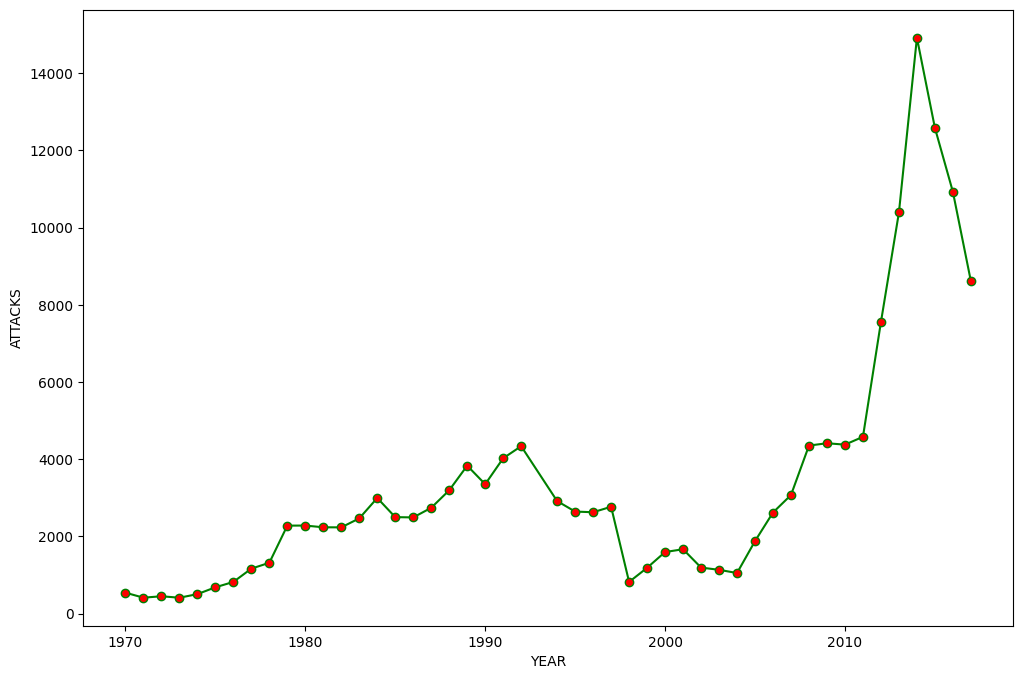

In [27]:
# Chart - 1 visualization code

'''
sorting values with groupby year and Successful attempts for which year have most & least attempts of attack
#Visualisation of total number of attack in all years
'''
grpby_year = data.groupby('iyear')['success'].sum()

fig = plt.figure(figsize =(12, 8))
plt.xlabel('YEAR')
plt.ylabel('ATTACKS')
plt.plot(grpby_year.index,grpby_year,color = 'green',
         linestyle = 'solid', marker = '.',
         markerfacecolor = 'red', markersize = 12)
plt.show()

[Text(0, 0, '542'),
 Text(0, 0, '412'),
 Text(0, 0, '449'),
 Text(0, 0, '411'),
 Text(0, 0, '504')]

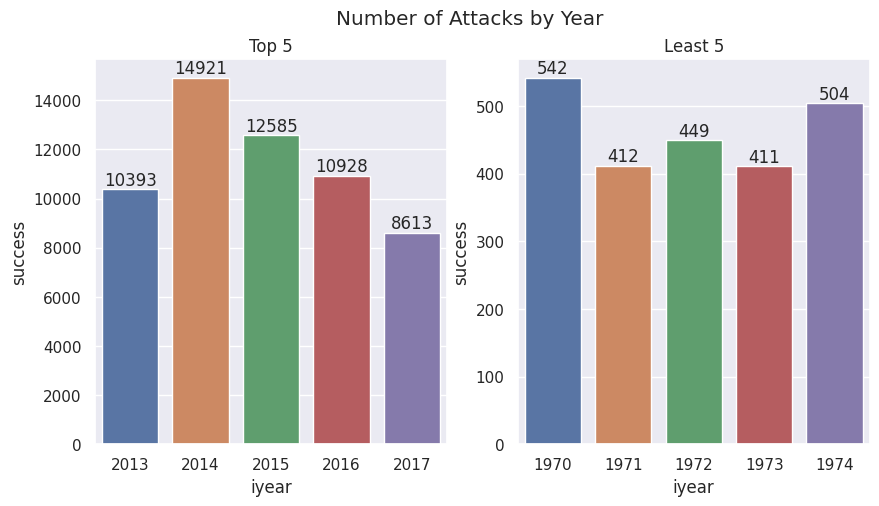

In [28]:
#top 10 Most of the attacks yearwise VS Least attacks yearwise
top5_series = grpby_year.sort_values(ascending = False)
top5 = top5_series[:5]
least5_series = grpby_year.sort_values(ascending = True)
least5 = least5_series[:5]

#visualtizing the results
sns.set()
figure, axes = plt.subplots(1, 2,figsize=(10, 5))
figure.suptitle('Number of Attacks by Year')

sns.barplot(x = top5.index,y = top5,ax=axes[0])
axes[0].title.set_text('Top 5')
axes[0].bar_label(axes[0].containers[0])

sns.barplot(x = least5.index ,y=least5,ax=axes[1])
axes[1].title.set_text('Least 5')
axes[1].bar_label(axes[1].containers[0])

##### 1. Why did you pick the specific chart?

BarPlot : Using bar plot give the variate analysis of the data i.e using 2 features for drawing conclusion from 2 features of dataset
- Making the bar plot of all the years and and Number of attacks that year
- which year has witneesed the the most number of attacks
  

##### 2. What is/are the insight(s) found from the chart?

* Top 5 years of number of attacks:
  - 1. 2013
  - 2. 2014
  - 3. 2015
  - 4. 2016
  - 5. 2017

* Least 5  years of number of attacks:
  - 1. 1970
  - 2. 1971
  - 3. 1972
  - 4. 1973
  - 5. 1974

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Looking at the above trend, Incresing technology also increases the number of terrosism attacks

#### Chart - 2

In [29]:
# Chart - 2 visualization code
#2)in which year which Country has maximum attacks

In [30]:
data['country_txt'].nunique()

204

In [31]:
grpby_countrytxt = data.groupby('country_txt')['success'].sum()
grpby_countrytxt

country_txt
Afghanistan            11061
Albania                   64
Algeria                 2442
Angola                   453
Antigua and Barbuda        1
                       ...  
Yemen                   2772
Yugoslavia               178
Zaire                     39
Zambia                    51
Zimbabwe                  90
Name: success, Length: 204, dtype: int64

Text(0.5, 1.0, 'Top 5 Countries with most attack')

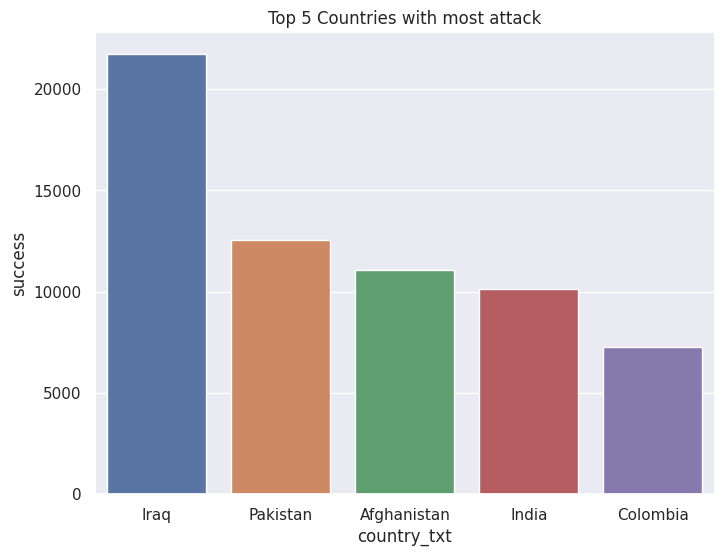

In [32]:
#visualtizing the results
top5_con = grpby_countrytxt.sort_values(ascending = False)
top5_country = top5_con[:5]

fig = plt.figure(figsize =(8, 6))
top5_con_plot = sns.barplot(x = top5_country.index, y = top5_country)
top5_con_plot.set_title('Top 5 Countries with most attack')

##### 1. Why did you pick the specific chart?

Bar chart can give the exact Comparision Between the countries which is a categorical variable with number of attacks in each country

##### 2. What is/are the insight(s) found from the chart?

* Countries with most attacks:
  - Iraq
  - Pakistan
  - Afghanistan
  - India
  - Colombia

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Can be Help to focus to Governance, diaster management and Providing aid to victims
* Framing Bussiness stratergies in nations

#### Chart - 3

In [33]:
# Chart - 3 visualization code
# 3)which region had maximum number of attacks
data['region_txt'].nunique()

12

In [34]:
grpby_region = data.groupby(['region_txt'])['success'].sum()
grpby_region

region_txt
Australasia & Oceania            239
Central America & Caribbean     8988
Central Asia                     491
East Asia                        672
Eastern Europe                  4412
Middle East & North Africa     43503
North America                   2734
South America                  16787
South Asia                     38903
Southeast Asia                 10629
Sub-Saharan Africa             15762
Western Europe                 14030
Name: success, dtype: int64

In [35]:
top5_reg = grpby_region.sort_values(ascending = False)
top5_reg = top5_reg[:5]
top5_reg


region_txt
Middle East & North Africa    43503
South Asia                    38903
South America                 16787
Sub-Saharan Africa            15762
Western Europe                14030
Name: success, dtype: int64

Text(0.5, 1.0, 'Top 5 regions with most attack')

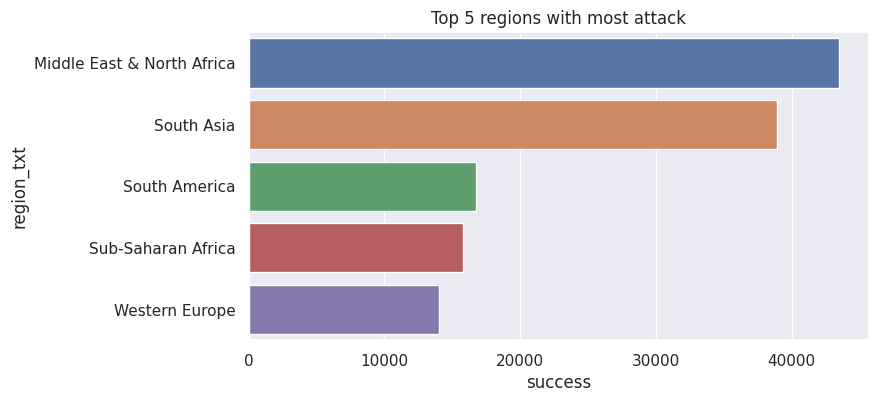

In [36]:
fig = plt.figure(figsize =(8, 4))
top5_reg_plot = sns.barplot(x = top5_reg, y = top5_reg.index)
top5_reg_plot.set_title('Top 5 regions with most attack')

##### 1. Why did you pick the specific chart?

* displying which region is most prone to attacks can be well visualized using bar plot

##### 2. What is/are the insight(s) found from the chart?

Middle East & North Africa  has largest number of attacks followed by the South Asia South America, Sub-Saharan Africa, Western Europe

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This information can lead to the amount of terrorism happens in this area and where the terrorism exits there is very limited scope of bussiness and anyone won't like to invest in such areas

#### Chart - 4

In [37]:
# Chart - 4 visualization code

In [38]:
grpby_attacktype = data.groupby(['attacktype1_txt'])['nkill'].sum()
grpby_attacktype

attacktype1_txt
Armed Assault                          153591.5
Assassination                           24069.5
Bombing/Explosion                      155972.0
Facility/Infrastructure Attack           3587.0
Hijacking                                3705.5
Hostage Taking (Barricade Incident)      4490.0
Hostage Taking (Kidnapping)             24786.5
Unarmed Assault                           823.0
Unknown                                 31905.0
Name: nkill, dtype: float64

Text(0.5, 1.0, 'Number of kills by Attack type')

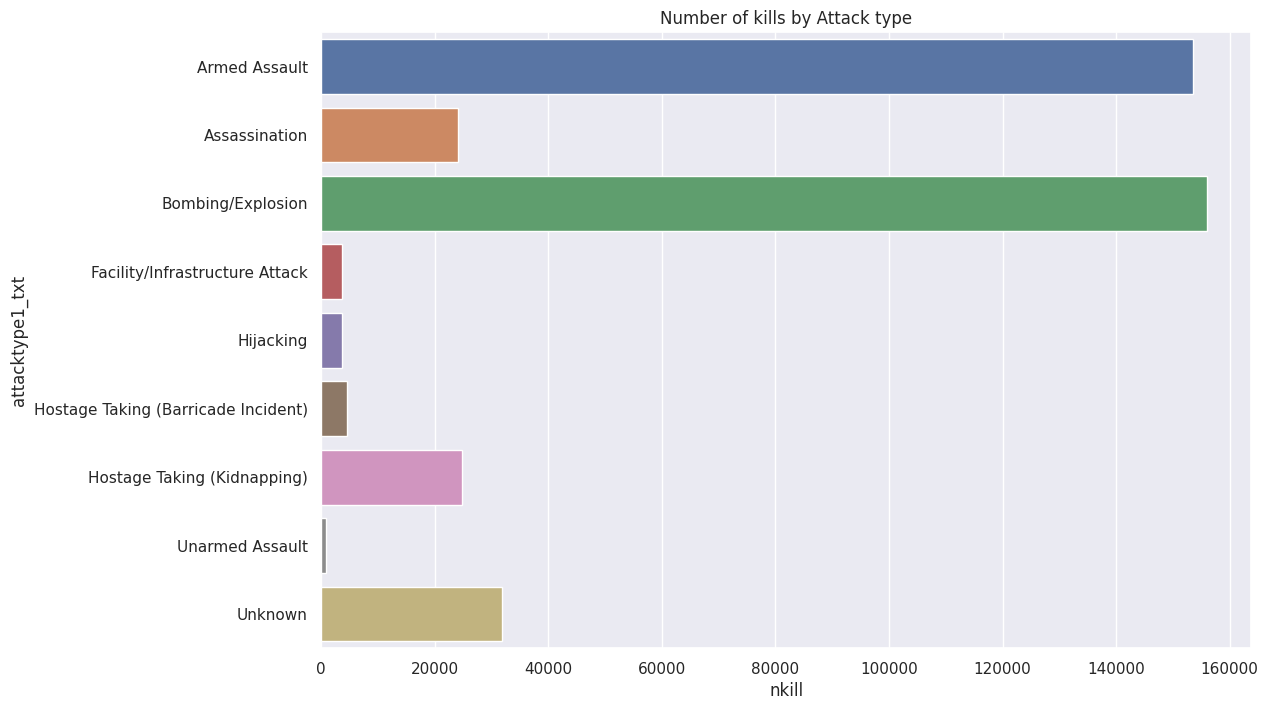

In [39]:
fig = plt.figure(figsize =(12, 8))
grpby_attacktype = sns.barplot(x = grpby_attacktype, y = grpby_attacktype.index)
grpby_attacktype.set_title('Number of kills by Attack type')

##### 1. Why did you pick the specific chart?

* Bar chart can throughly express the comparision of one categorical and one numerical feature

##### 2. What is/are the insight(s) found from the chart?

* the chart throw the focus where the number of peoples killed by which type of attack
Armed Assault and Bombing/ Explosion causees most number of deaths


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* tough we have terrorism dataset so here we can compair that which attack type harms the maximum number of people

#### Chart - 5

Text(0.5, 1.0, 'people got wounded by Attack type')

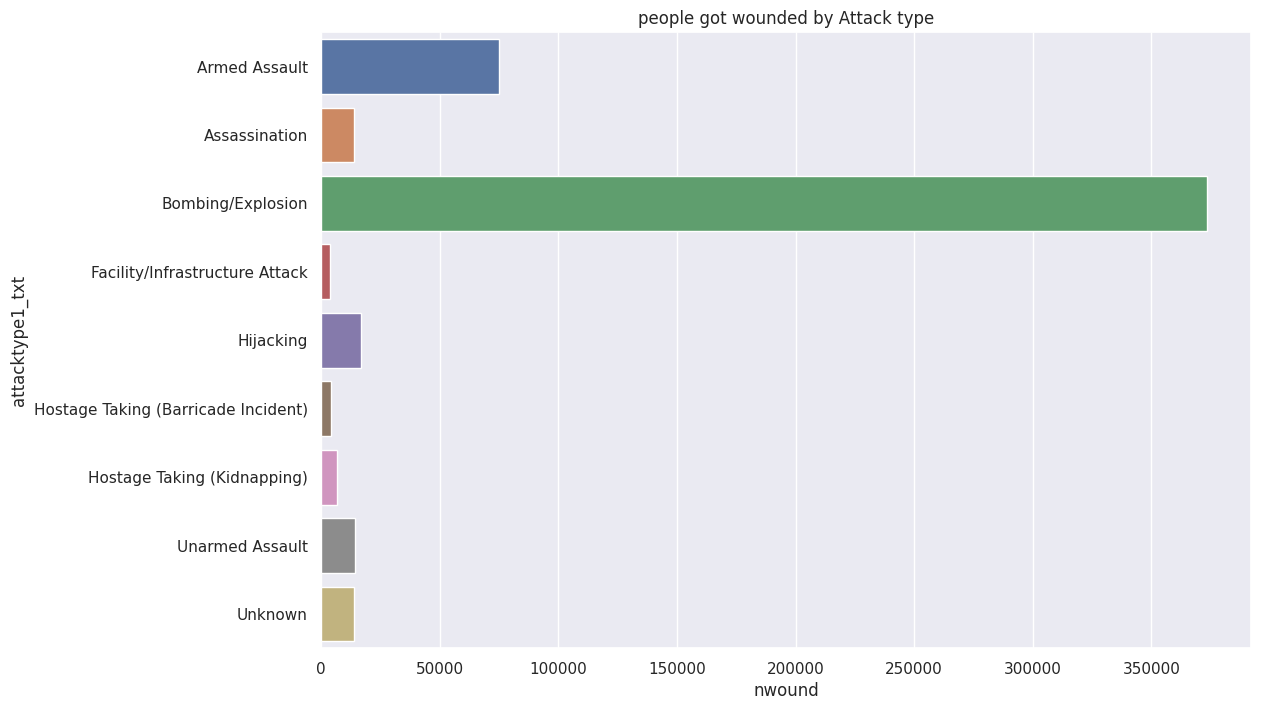

In [40]:
# Chart - 5 visualization code
grpby_attacktype_wounds = data.groupby(['attacktype1_txt'])['nwound'].sum()
fig = plt.figure(figsize =(12, 8))
grpby_attacktype_wounds = sns.barplot(x = grpby_attacktype_wounds, y = grpby_attacktype_wounds.index)
grpby_attacktype_wounds.set_title('people got wounded by Attack type')

##### 1. Why did you pick the specific chart?

* To show the comparision between the Attack type and NUmber of peoples got wonded


##### 2. What is/are the insight(s) found from the chart?

* The number of people got wounded by the boombings and explosions is far more the any other attacks

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* here we get to know that boombings and explosions can make peoples wounded far more than any other attack and also can kill most of the peoples ( as seen in prevision chart)


#### Chart - 6

In [41]:
# Chart - 6 visualization code
target_counts = data['targtype1_txt'].value_counts()
target_counts

Private Citizens & Property       42529
Military                          26882
Police                            24128
Government (General)              20784
Business                          20227
Transportation                     6549
Unknown                            5831
Utilities                          5548
Religious Figures/Institutions     4376
Educational Institution            4261
Government (Diplomatic)            3507
Terrorists/Non-State Militia       2971
Journalists & Media                2850
Violent Political Party            1839
Airports & Aircraft                1306
Telecommunication                   996
NGO                                 938
Tourists                            422
Maritime                            314
Food or Water Supply                298
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

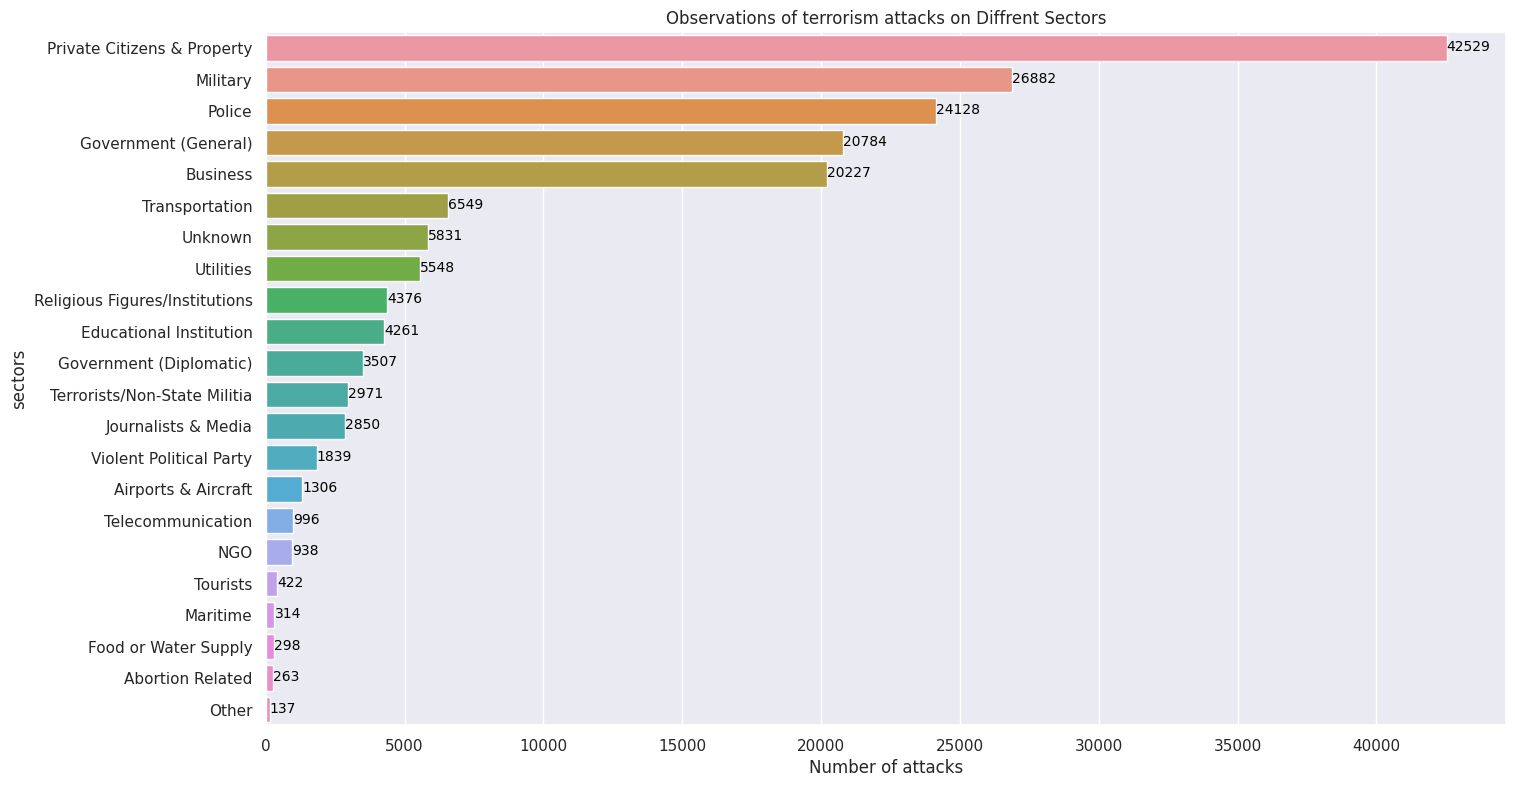

In [42]:
fig, ax = plt.subplots(figsize =(16, 9))
target_counts_plot = sns.barplot(x = target_counts, y = target_counts.index)
target_counts_plot.set(xlabel ="Number of attacks", ylabel = "sectors", title ='Observations of terrorism attacks on Diffrent Sectors')
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             int(round((i.get_width()), 0)),
             fontsize = 10,
             color ='black')

##### 1. Why did you pick the specific chart?

* Using Bar chart clearly express the comparison of numbers of Target type  

##### 2. What is/are the insight(s) found from the chart?

* We can clearly see the diffrence in the above chart that which are the main target areas where terrorist plan there attacks

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Private Citizens and Property has been targeted at most with 25 of total share followed by military with 15.4% share, police with 13.8% share, goverment with 11.9% share, business with 11.5% share and so onn

#### Chart - 7

In [43]:
# Chart - 7 visualization code
gname = data['gname'].value_counts().sort_values(ascending = False)
gname = gname[1:11]
gname

Taliban                                             7457
Islamic State of Iraq and the Levant (ISIL)         5584
Shining Path (SL)                                   4306
Al-Shabaab                                          3274
Farabundo Marti National Liberation Front (FMLN)    2991
Irish Republican Army (IRA)                         2662
New People's Army (NPA)                             2501
Boko Haram                                          2408
Revolutionary Armed Forces of Colombia (FARC)       2332
Kurdistan Workers' Party (PKK)                      2183
Name: gname, dtype: int64

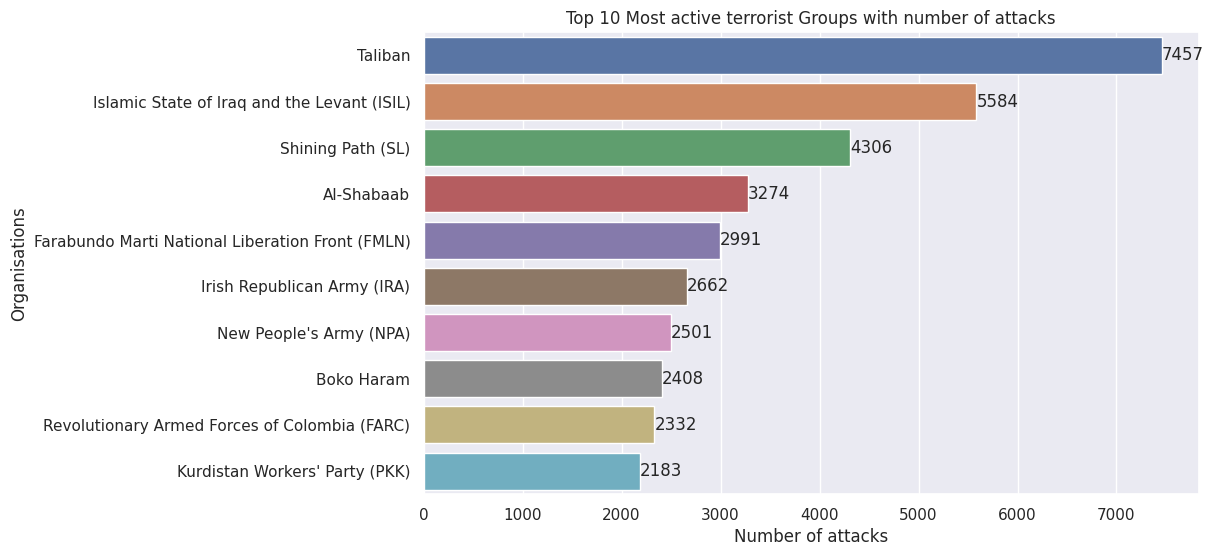

In [44]:
fig = plt.figure(figsize =(10, 6))
gname_10_plot = sns.barplot(x = gname, y = gname.index)
gname_10_plot.set_title('Top 10 Most active terrorist Groups with number of attacks')
gname_10_plot.set(xlabel ="Number of attacks", ylabel = "Organisations")
for i in gname_10_plot.containers:
    gname_10_plot.bar_label(i,)

##### 1. Why did you pick the specific chart?



*   Bar chart can clearly show the number of attacks present in the





##### 2. What is/are the insight(s) found from the chart?

* we can evaluet the number of attacks attempted by the terrorist groups, which terrorist groups are mostly active

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Though we have larger share of  79832 unknown 'gname' values But Showing them in chartwon't give us more valueable output and the chart looks disrupt, so choosing from second number gave this insights
*   Taliban is the most active terrorist group with 7143 number of claimed attacks followed by
Islamic State of Iraq and the Levant (ISIL)         5579,
Shining Path (SL)                                   4277,
Al-Shabaab                                          3225,
Farabundo Marti National Liberation Front (FMLN)    2976.



#### Chart - 8

<Figure size 1200x800 with 0 Axes>

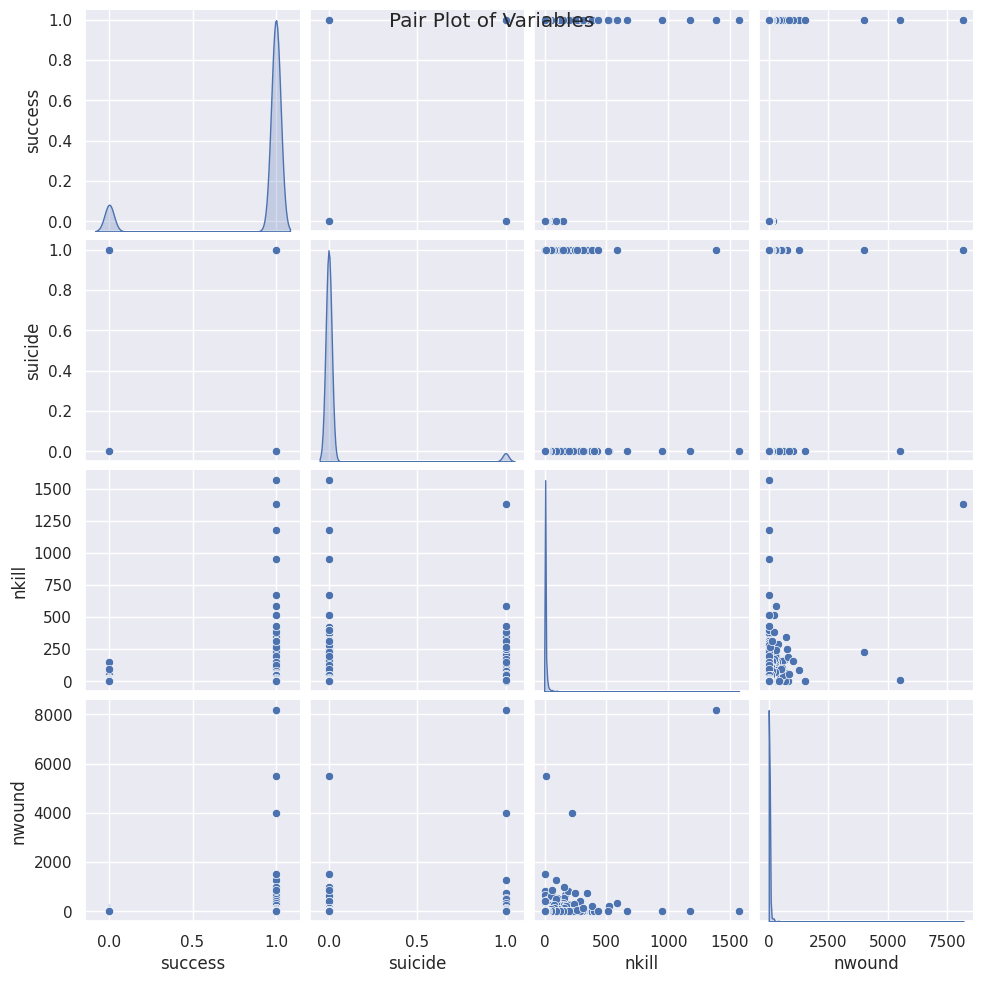

In [45]:
# Chart - 8 visualization code
columns_of_intrest = ['success', 'suicide', 'nkill', 'nwound']
relevant_data = data[columns_of_intrest]

correlation_matrix = relevant_data.corr()

plt.figure(figsize=(12, 8))
sns.pairplot(relevant_data, kind='scatter', diag_kind='kde')
plt.suptitle('Pair Plot of Variables')
plt.show()

##### 1. Why did you pick the specific chart?

* Certainly! To explore relationships between variables like success, suicide attacks, and casualties

##### 2. What is/are the insight(s) found from the chart?

* it creates pair plots using pairplot() to display pairwise relationships between these variables. The diagonal shows the kernel density estimate (KDE) of each variable, while the scatter plots show relationships between different pairs of variables.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* These visualizations will help you understand the correlations between success, suicide attacks, and casualties in the dataset, allowing for insights into how these variables might relate to each other.

#### Chart - 9

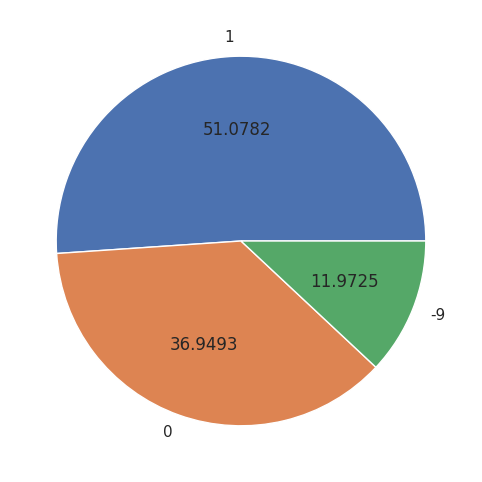

In [46]:
# Chart - 9 visualization code
property_damage_counts = data['property'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(property_damage_counts, labels  = property_damage_counts.index,autopct='%.4f')
plt.show()

##### 1. Why did you pick the specific chart?

* The pie chart was chosen to display proportions of different categories (0, 1, -9) in property damage data. Pie charts work well when showcasing parts of a whole, making it easier to visualize the distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

* **51.3% (1)**: Indicates a significant portion of incidents resulted in some level of property damage.
* **36.7% (0)**: Represents instances with no property damage or minimal damage.
* 11.99% (-9): Shows a notable percentage where property damage information is missing or not available.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact**: Understanding the distribution of property damage levels can assist in risk assessment and resource allocation for security measures. Addressing incidents with property damage may enhance safety protocols.
* **Negative Growth Potential**: The presence of nearly 12% missing data (-9) in property damage information can hinder comprehensive analysis. Lack of information might impact decision-making and risk assessment negatively, potentially leading to blind spots in security strategies or resource allocation.

#### Chart - 10

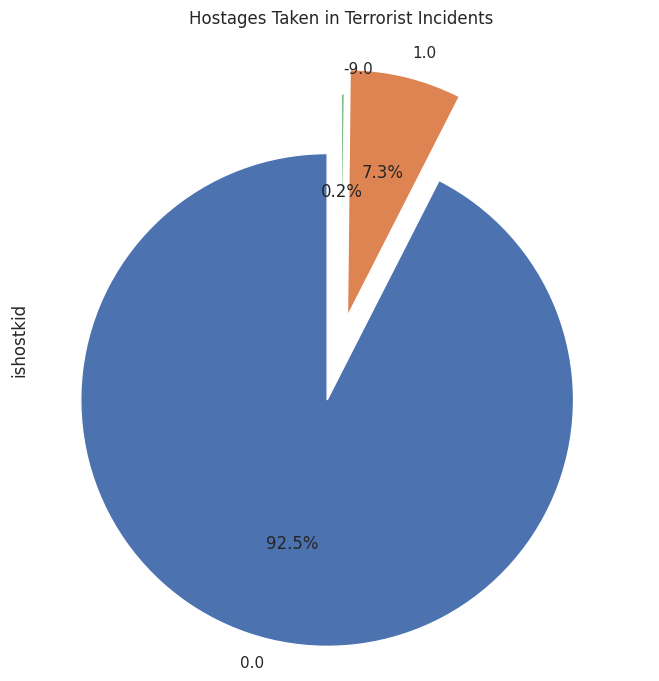

In [47]:
# Chart - 10 visualization code
hostage_counts = data['ishostkid'].value_counts()

# Plotting the data as a pie chart or bar chart
plt.figure(figsize=(12, 8))
hostage_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90,explode=(0.25,0.1,0))
plt.title('Hostages Taken in Terrorist Incidents')
plt.show()

##### 1. Why did you pick the specific chart?

* Pie chart shows the exact diffrenciation of the Hostage Situation in overall terrorist attacks

##### 2. What is/are the insight(s) found from the chart?

* **92.5%(0)** : Hostages  Not taken
* **7.4%(1)** : Hostages Taken
* **0.2%(-9)**: Missing / Not Available


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Impact** : In the terrorist attack's, Hostage Situtations is not a comman 92.5% cases arises with Non-Hostage Situation
* **Negative Impact** :7.4% of Cases In terorrism arises if Hostages,
Due to small amount of cases , considering all terrorism situation can be a setback

#### Chart - 11

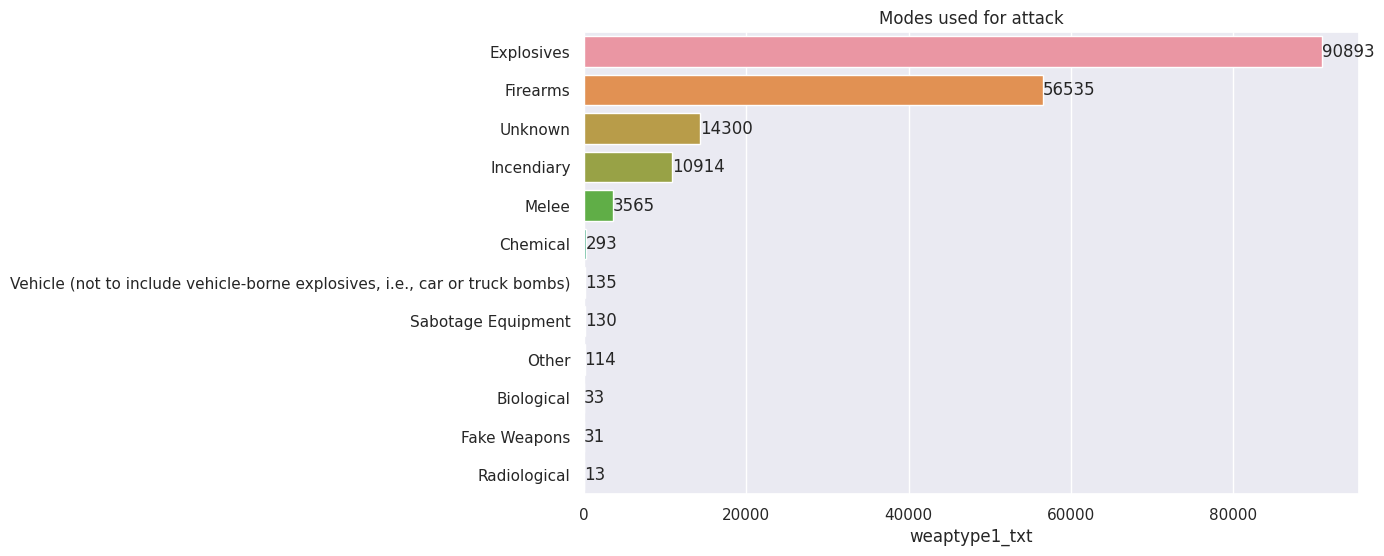

In [48]:
# Chart - 11 visualization code
weapon_type = data['weaptype1_txt'].value_counts()
fig = plt.figure(figsize =(10, 6))
weapon_type_bar = sns.barplot(x = weapon_type, y = weapon_type.index)
weapon_type_bar.set_title('Modes used for attack')
for i in weapon_type_bar.containers:
    weapon_type_bar.bar_label(i,)

##### 1. Why did you pick the specific chart?

* Bar chart is used for categorical values and can clearly express the number of of weapons used for the attack

##### 2. What is/are the insight(s) found from the chart?

* Explosives(89005) : explosive has been widely used as an weapon type for terrorism
* firearms(55756) : Followed by firearms
* Unknown(14001) : This is the missing data or unnoted weapons type of event
* Incendairy (10754) : This are the diffrent devices used to perform diffrent type of fire
* melee( 3474) : Melee is a creating situtations of chaos and confusions and disturb public order
* chemical(292) : creating chemical Bombs,or chemical attacks

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impact : The above Analysed data and Bar graph shows the type of attacks from differnt type of weapons and can be used to prepare of the diffrent possible attacks and tackle to avoid many large level terrorist attacks

* negative Impact : There are many Unknown weapons types present in the this data , which results in loss of valueable data and faluire of data extractions

#### Chart - 12

<Figure size 1000x600 with 0 Axes>

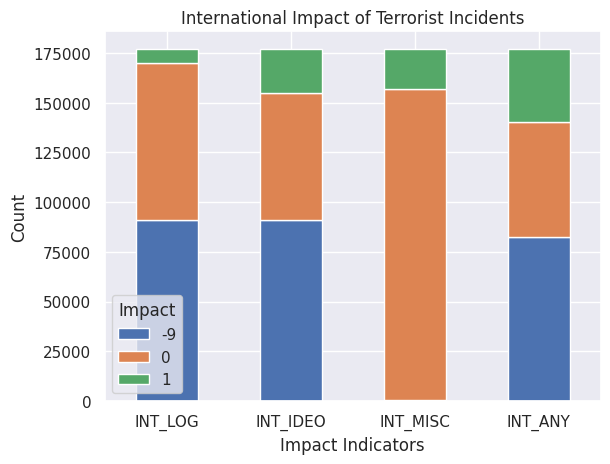

In [49]:
# Chart - 12 visualization code
international_columns = ['INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']
international_impact = data[international_columns]

# Counting occurrences of different international impact indicators
impact_counts = international_impact.apply(pd.Series.value_counts)

# Plotting the data as a bar chart
plt.figure(figsize=(10, 6))
impact_counts.T.plot(kind='bar', stacked=True)
plt.title('International Impact of Terrorist Incidents')
plt.xlabel('Impact Indicators')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Impact')
plt.show()

##### 1. Why did you pick the specific chart?

* For this type of data with multiple categories (INT_LOG, INT_IDEO, INT_MISC, INT_ANY), a stacked bar chart can effectively compare the distribution of these categories across different values. This chart type allows for easy comparison of the total impact and its components.

##### 2. What is/are the insight(s) found from the chart?

* Distribution of International Impact: The stacked bar chart would illustrate the breakdown of different international impact indicators (INT_LOG, INT_IDEO, INT_MISC) for each value of INT_ANY. It shows the composition of the total international impact.
* High Instances of No Indication: A significant number of incidents have no indication of international logistics, ideology, or miscellaneous factors (INT_ANY = 0).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:
  - Enhanced Understanding: Understanding the patterns of international influence can aid in risk assessment, policy-making, and security strategies, potentially fostering a safer environment for business operations.
  - Informed Decision-Making: Knowledge of global trends in terrorism could influence decisions regarding international investments or expansions.

* Negative Growth Potential:
  - Potential Limitations: A high frequency of incidents without any indication of international involvement (INT_ANY = 0) might lead to oversight in assessing global risks. Ignoring these incidents might result in gaps in security measures or decision-making, potentially exposing businesses to unforeseen risks in international operations or expansions.

#### Chart - 13

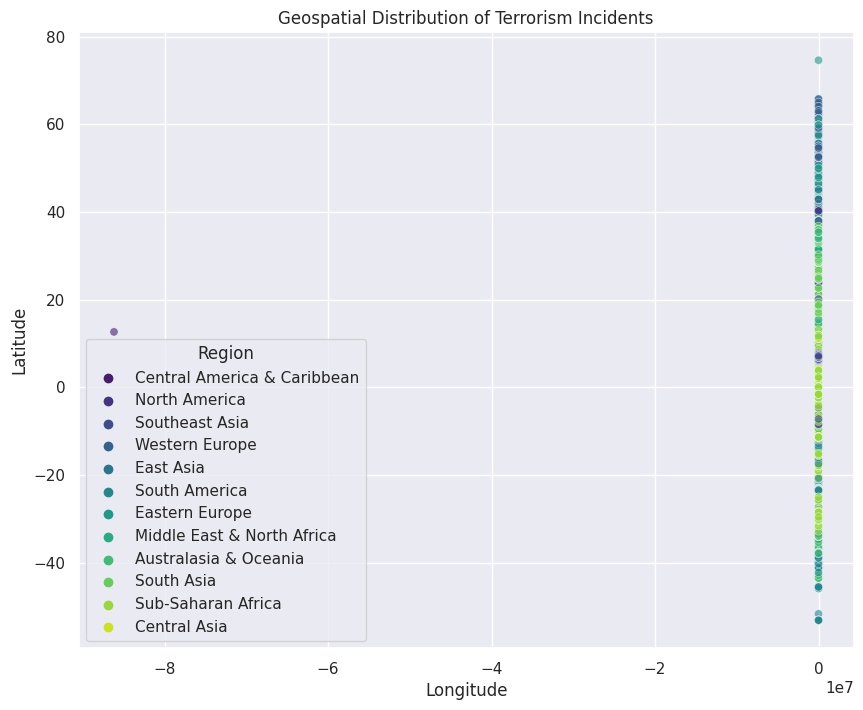

In [50]:
# Chart - 13 visualization code
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=data, hue='region_txt', palette='viridis', alpha=0.6)
plt.title('Geospatial Distribution of Terrorism Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Region')
plt.show()

In [51]:
import plotly.express as px

country_incidents = data['country_txt'].value_counts().reset_index()
country_incidents.columns = ['Country', 'Incident Count']
fig = px.choropleth(country_incidents, locations='Country', locationmode='country names',
                    color='Incident Count', hover_name='Country',
                    title='Terrorism Incidents by Country')
fig.update_layout(showlegend=False)
fig.show()

##### 1. Why did you pick the specific chart?

* a choropleth map shows the world map and the Reported incidence and side bar contains the Incident count which represents the exact represents the terrorism prone are around the world



##### 2. What is/are the insight(s) found from the chart?

* In this map , Iraq shows the highest terrorism incidences followed by afghanistan, pakistan and india . Moreover each country show the terrorism incidences seprately

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Bussiness impact** :
  -  Analysing the Terrorist attacks which can be helpfull for the Bussiness growth, framing stratagies  and expansion in all over the world.


#### Chart - 14 - Correlation Heatmap

<ipython-input-52-6e062bad5ccc>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



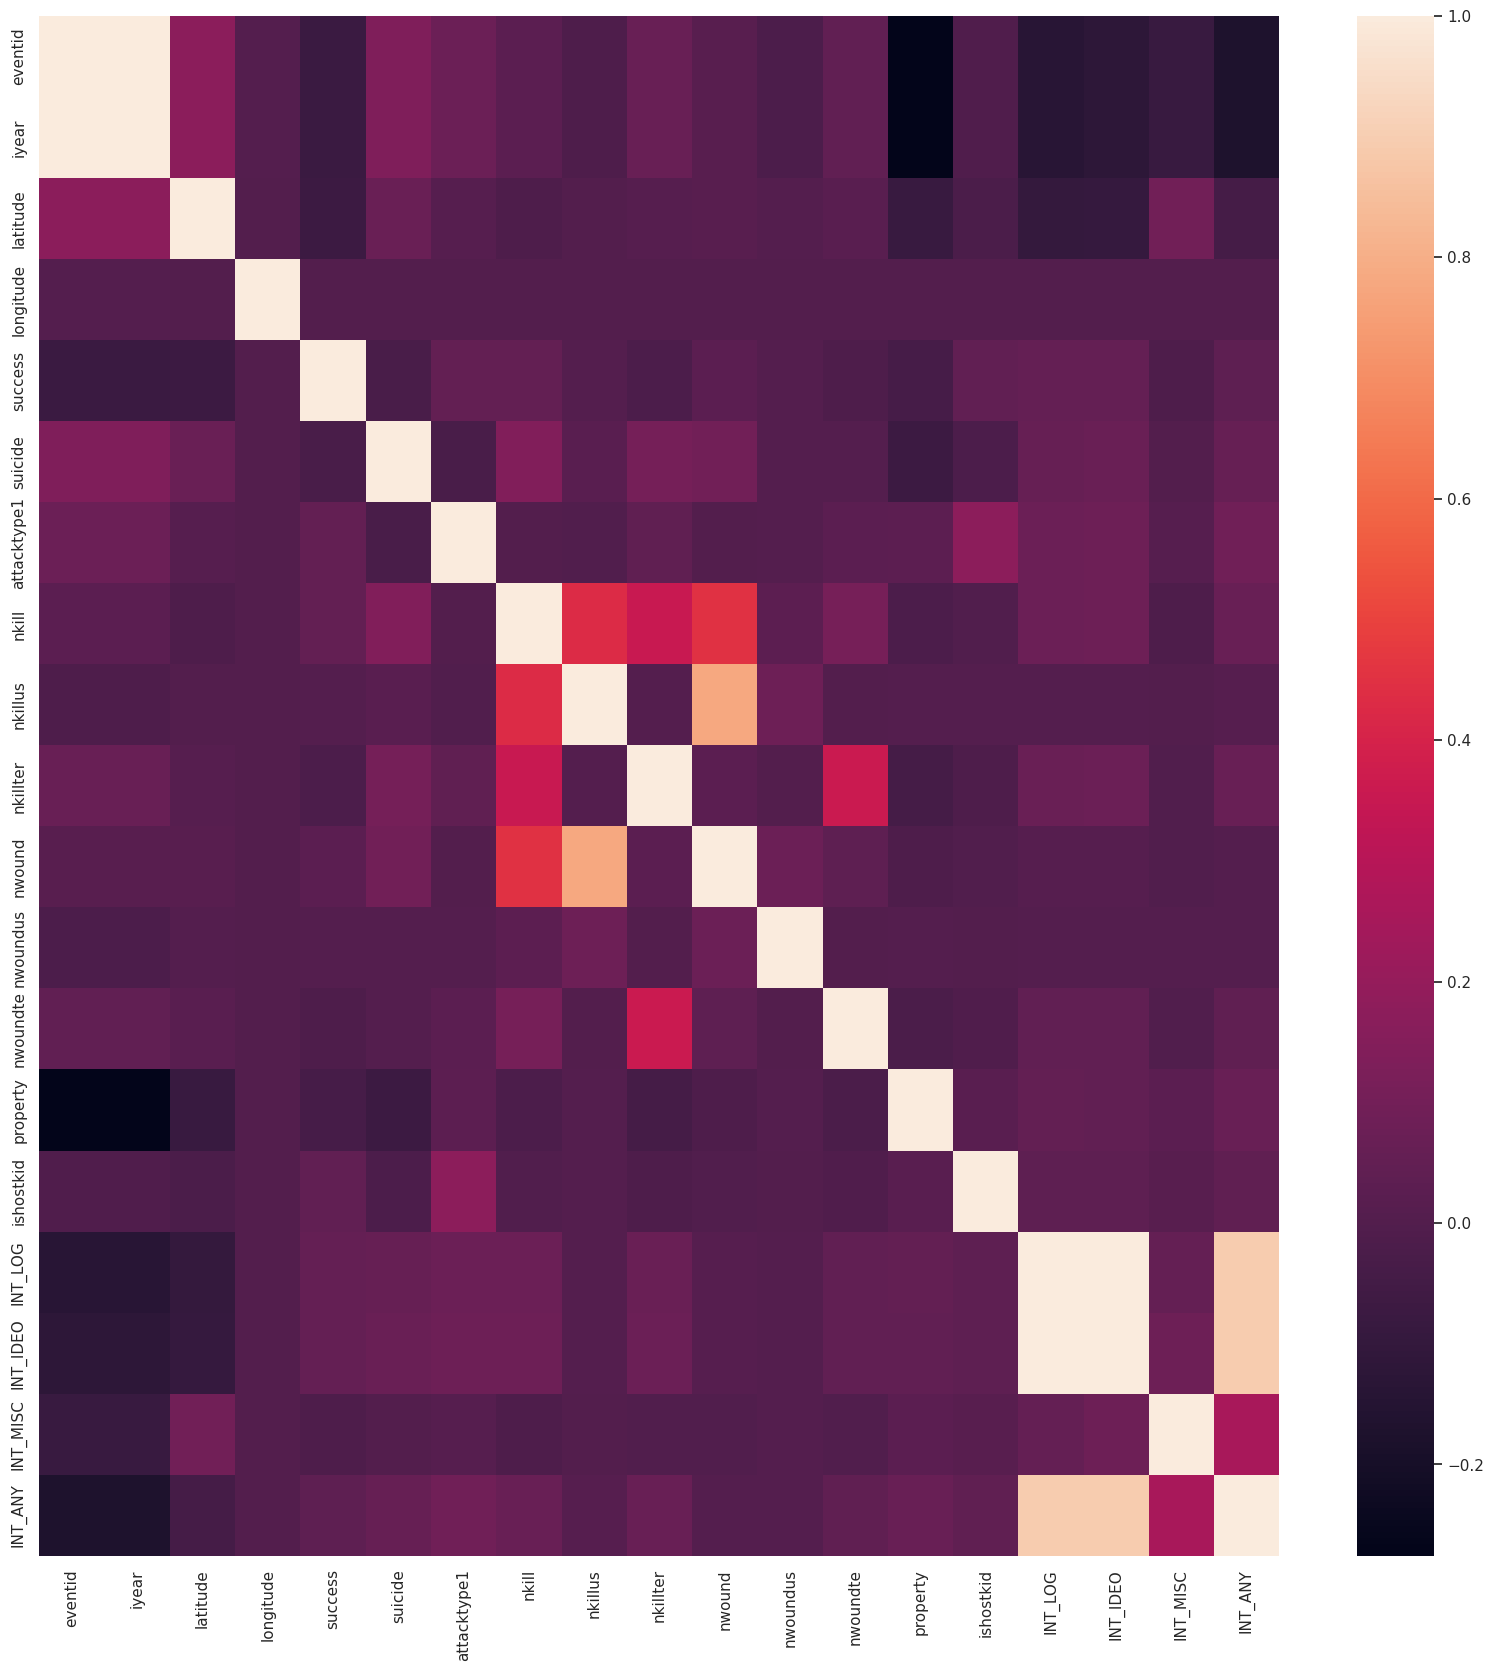

In [52]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,20))
correlation_matrix = data.corr()
sns.heatmap(data = correlation_matrix)
plt.show()

##### 1. Why did you pick the specific chart?

* Heatmap is the used specifically for co-relating each variable with each variable

##### 2. What is/are the insight(s) found from the chart?

* every variable is compared with each variable

#### Chart - 15 - Pair Plot

In [53]:
data.columns

Index(['eventid', 'iyear', 'country_txt', 'region_txt', 'city', 'latitude',
       'longitude', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nkillus',
       'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'ishostkid',
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

<Figure size 1200x800 with 0 Axes>

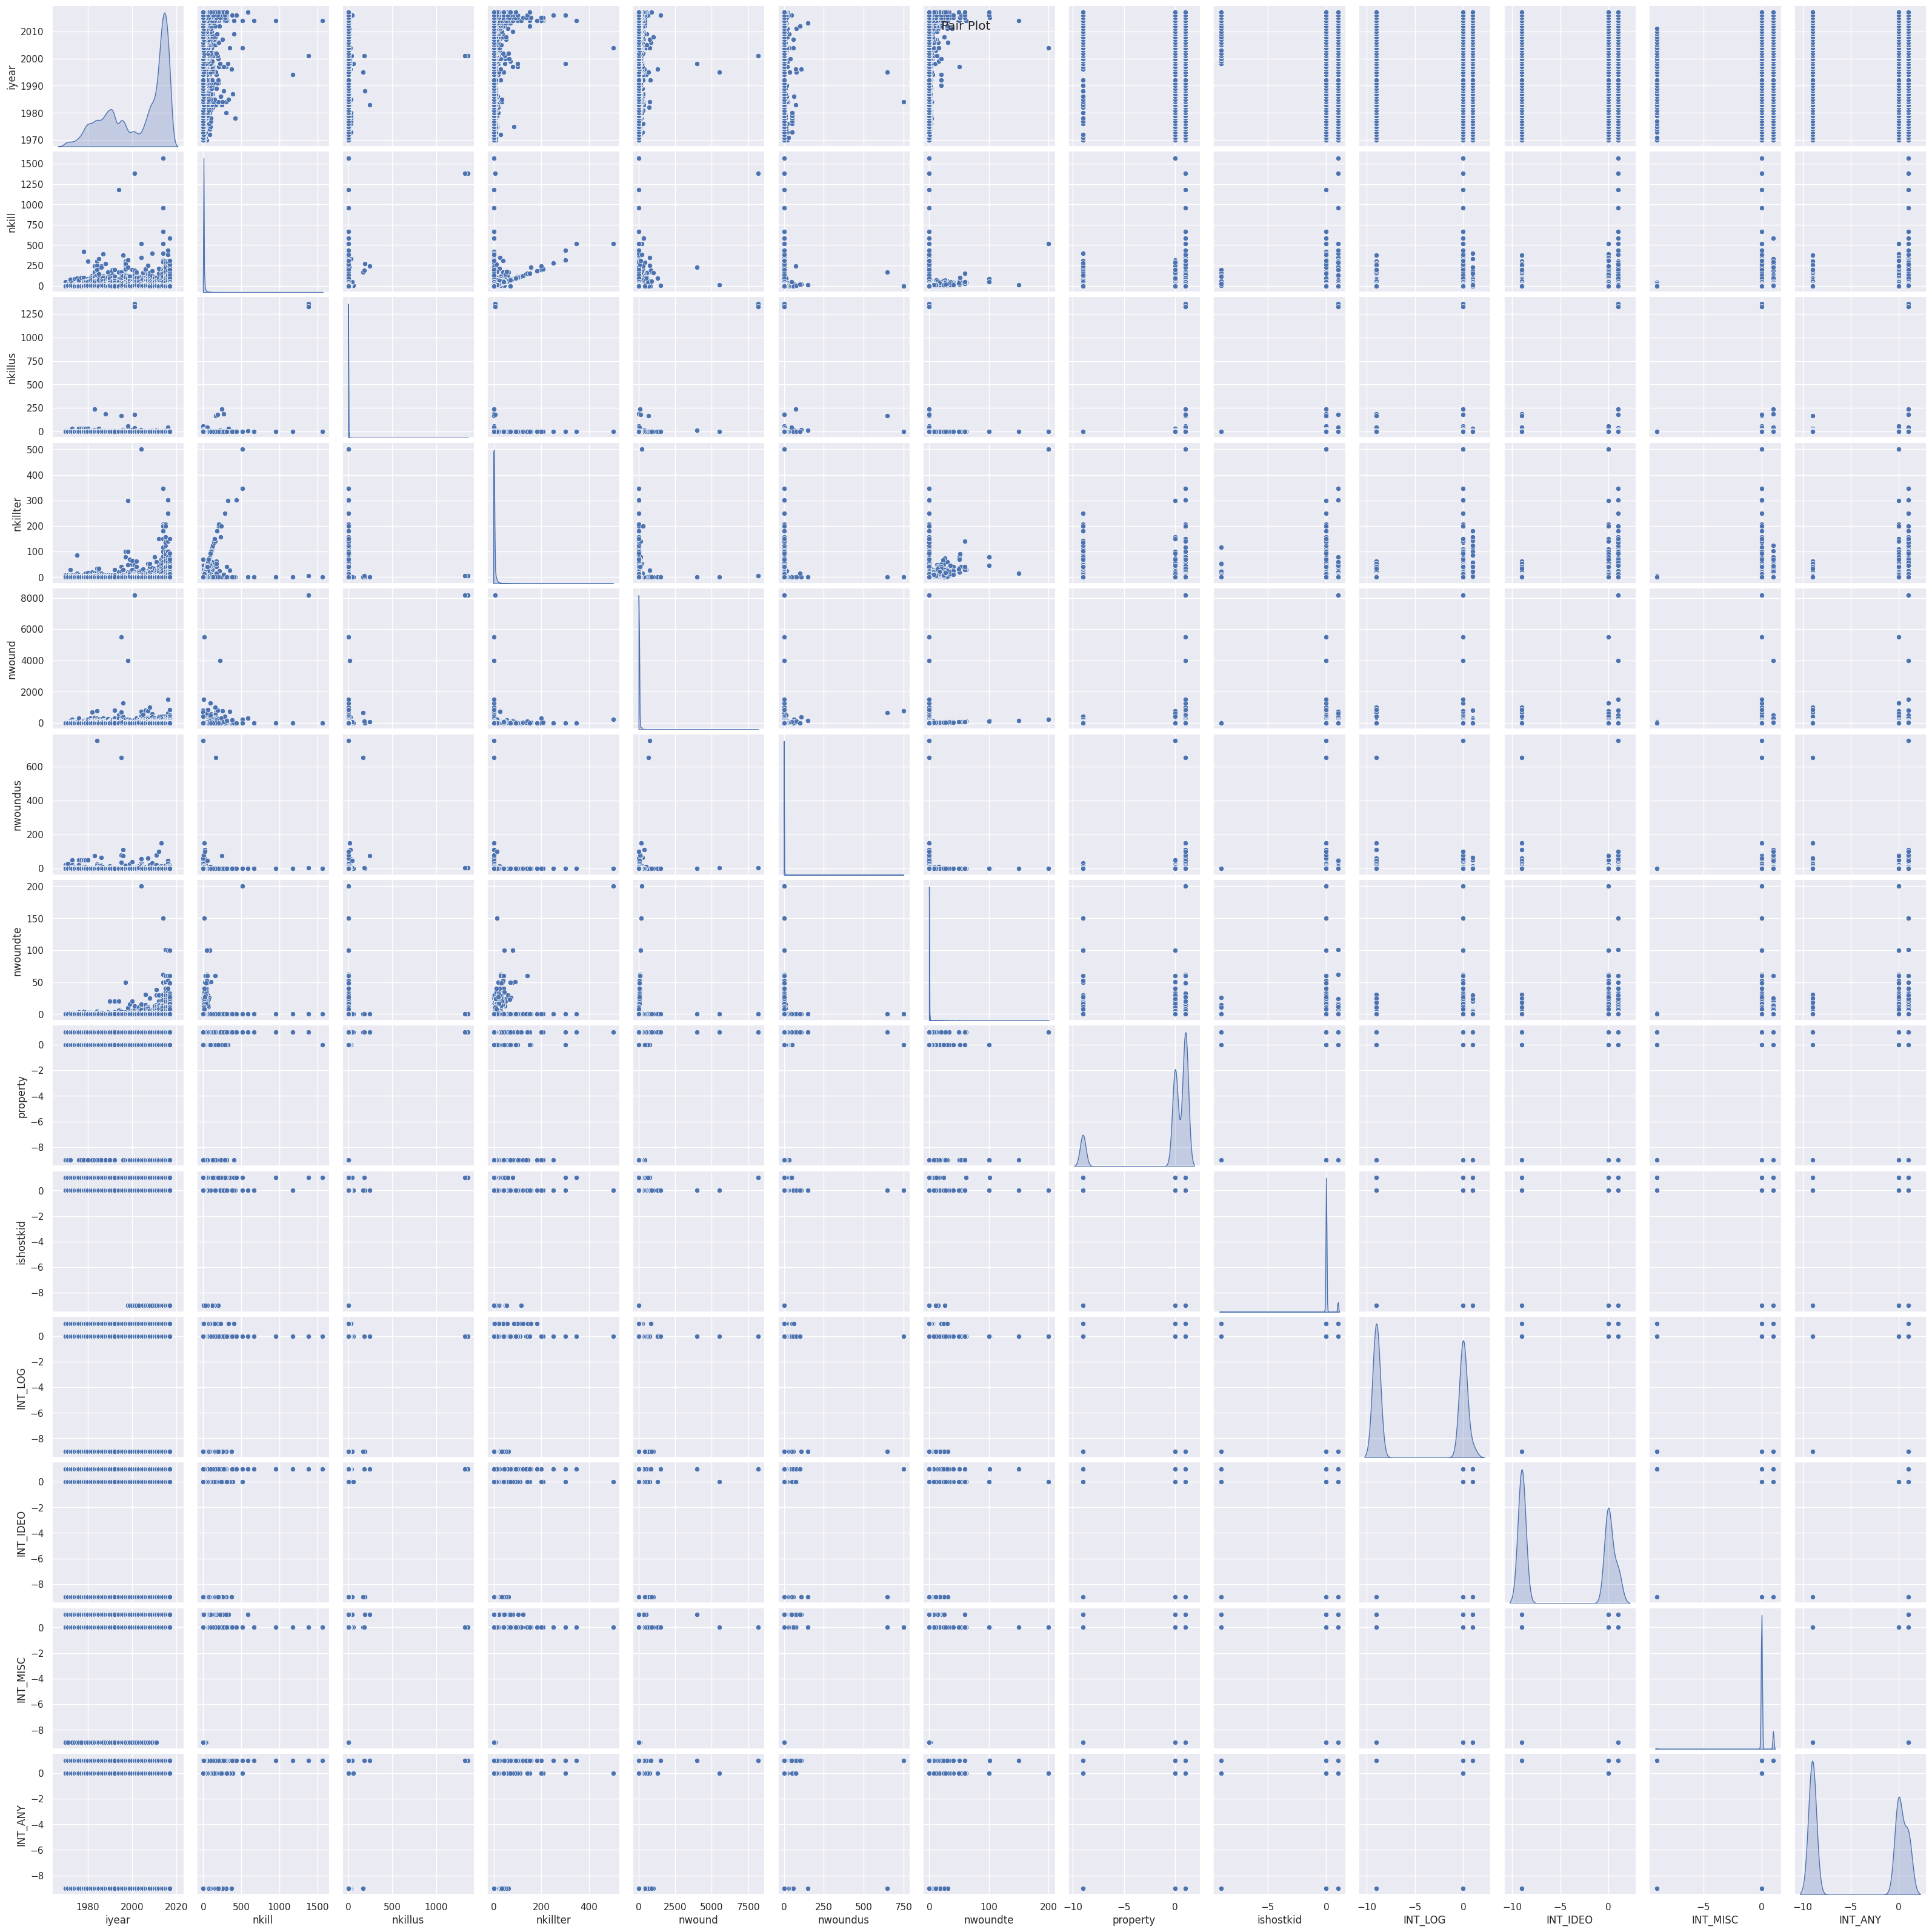

In [54]:
# Pair Plot visualization code
# Chart - 8 visualization code
columns_of_intrest = ['iyear', 'country_txt', 'region_txt', 'attacktype1_txt',
       'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nkillus',
       'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'ishostkid',
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY']
pairplot_data = data[columns_of_intrest]

correlation_matrix = relevant_data.corr()

plt.figure(figsize=(12, 8))
sns.pairplot(pairplot_data, kind='scatter', diag_kind='kde')
plt.suptitle('Pair Plot')
plt.show()

##### 1. Why did you pick the specific chart?

* Pair plot is used to show the relation for each variable in the dataset which plots individual plot for each and every variable using scatter plot




##### 2. What is/are the insight(s) found from the chart?

* scatter plot with each pair plot shows the ditribution of data with each variable

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

* **Risk Assessment and Mitigation:**
  - Geographic Risk Mapping: Utilize the insights on attack frequency by year, country, and region to map high-risk areas and enhance security measures in those locations.

* **Operational Decision-Making:**
  - Resource Allocation: Allocate resources and investments considering regions with the highest attack frequency or casualties, aiming for risk-aware operational planning.
  - Supply Chain Optimization: Utilize data on attacks affecting supply chains to optimize routes or diversify suppliers, ensuring operational continuity.

* **Security Measures:**
  - Crisis Response Planning: Develop robust crisis management plans leveraging insights on attack types, casualties, and hostages to prepare for immediate and effective responses in emergencies.

* **Stakeholder Engagement:**
  - Community Engagement: Leverage information on most active terrorist groups to collaborate with local authorities or communities in affected areas, promoting safety measures or community-building initiatives.

* **Brand Protection and Continuity:**
  - Brand Safety Measures: Use insights on property damages to strengthen insurance coverage or crisis communication strategies, safeguarding brand reputation during crises.

* **Long-term Strategies:**
  - Long-term Planning: Incorporate historical attack trends into long-term business strategies to foster sustainable and resilient business operations, considering geopolitical risks.

* **Innovation and Technology:**
  - Innovative Solutions: Explore innovative technologies or predictive models based on attack types and targets for early detection or risk prediction.

* **Compliance and Ethical Considerations:**
  - Compliance Adherence: Ensure compliance with security regulations and ethical data handling practices, considering the sensitivity of terrorism-related data.

* **Collaboration and Partnerships:**
  - Collaborative Efforts: Collaborate with industry peers or authorities to collectively address terrorism-related risks and create industry-wide security standards.

* **Continuous Analysis and Adaptation:**
  - Continuous Monitoring: Regularly update risk assessments and security protocols based on evolving attack patterns or new insights derived from ongoing analyses.
  
***By utilizing the analyses conducted, the client can adopt a proactive approach toward risk management, operational strategies, stakeholder engagement, and innovation, fostering a resilient and secure business environment while ensuring ethical and responsible data usage.***

# **Conclusion**

**The above analysis provides a comprehensive understanding of various aspects of terrorist incidents over different years, regions, attack types, and the involvement of terrorist groups**

# Here's a summarized conclusion based on above analysis

***Trends and Patterns:***
  * *Most Active Years:* Identified years with the highest and lowest numbers of attacks, offering insights into historical trends and variations in terrorist activities.

  * *Geographical Impact:* Highlighted countries and regions most affected by terrorist incidents, aiding in geographic risk assessment and security prioritization.

  * Attack Types and Impact: Explored the relationship between attack types and casualties, shedding light on the severity and nature of various attack methods.

  * *Target Analysis:* Identified targets of terrorist activities, providing insights into the primary objectives of these attacks.

  * *Terrorist Groups:* Revealed the most active terrorist groups, allowing for better understanding and monitoring of influential groups over time.


***Impact and Consequences:***
  * *Human Cost:* Explored the number of casualties (killed and wounded) caused by terrorist attacks, indicating the human toll and potential societal impacts.

  * *Property Damage:* Analyzed property damages caused by attacks, highlighting economic and infrastructural consequences.
Hostages Taken: Examined incidents involving hostages, emphasizing the threat to personal safety and security.

***Strategic Implications:***
  * *Risk Mitigation:* Insights can guide risk assessment strategies, aiding in security enhancement and resource allocation in high-risk regions or during vulnerable years.
  * *Operational Planning:* Useful for supply chain optimization, crisis response planning, and long-term business strategies considering geopolitical risks.
  * Collaboration and Engagement:* Encourages collaboration with communities, authorities, and industry peers to collectively address terrorism-related risks and enhance security measures.

***The above analyses provide a foundation for informed decision-making, allowing for proactive measures to mitigate risks, optimize operations, and ensure the safety and security of both people and assets in the face of terrorist threats.***

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***